In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import NonNeg

In [2]:
data_path = './data/ds5.csv'
test_size = .2
epochs = 500
batch_size = 4

In [3]:
df = pd.read_csv(data_path)

df['cum_number_of_fault'] = df['number_of_fault'].cumsum()

df

,testing_date,number_of_fault,cum_number_of_fault
0,1,2,2
1,2,0,2
2,3,2,4
3,4,3,7
4,5,3,10
...,...,...,...
68,69,5,351
69,70,5,356
70,71,5,361
71,72,3,364


In [4]:
X = df[['testing_date']]
y = df[['cum_number_of_fault']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

In [5]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [6]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='tanh', kernel_constraint=NonNeg()))
model.add(Dense(128, activation='tanh', kernel_constraint=NonNeg()))
model.add(Dense(128, activation='tanh', kernel_constraint=NonNeg()))
model.add(Dense(1, activation='linear', kernel_constraint=NonNeg()))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/500


/Users/zama/miniforge3/envs/python3_11_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16.3798 - val_loss: 20.9031
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4886 - val_loss: 7.5042
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0323 - val_loss: 1.9954
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4798 - val_loss: 0.4519
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0853 - val_loss: 0.1227
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288 - val_loss: 0.0373
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 - val_loss: 0.0132
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 - val_loss: 0.0055
Epoch 9/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115 - val_loss: 0.0022
Epoch 10/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125 - val_loss: 0.0016
Epoch 11/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - val_loss: 8.3093e-04
Epoch 12/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0233


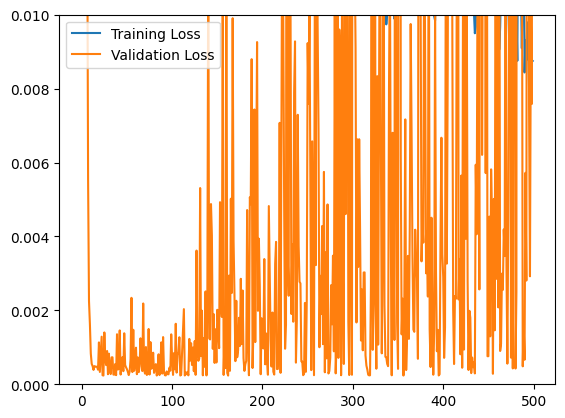

In [7]:
loss = model.evaluate(X_test, y_test)

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.ylim(0, .01)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


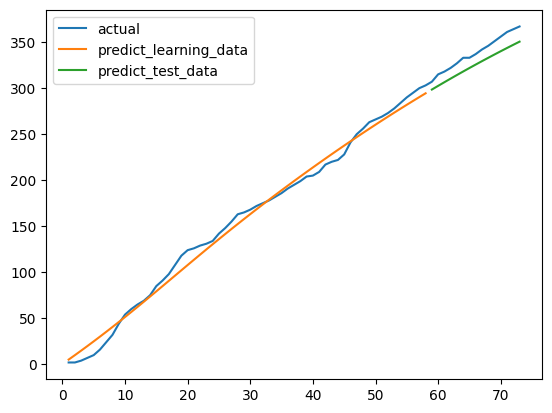

In [8]:
y_pred_lea = model.predict(X_train)
y_pred = model.predict(X_test)

plt.plot(df['testing_date'], df['cum_number_of_fault'], label='actual')
plt.plot(scaler_X.inverse_transform(X_train), scaler_y.inverse_transform(y_pred_lea), label='predict_learning_data')
plt.plot(scaler_X.inverse_transform(X_test), scaler_y.inverse_transform(y_pred), label='predict_test_data')
plt.legend()
plt.show()